In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sne
import IPython.display as display
import calendar
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as linear_model
from __future__ import division
from collections import Counter
%matplotlib inline

In [2]:
coloums=['click','hour','C1','banner_pos','site_category','site_domain'
 ,'app_domain','app_category','device_type','device_conn_type'
,'device_model','C14','C15','C16','C17','C18','C19','C20','C21']

In [3]:
chunlsize=1500000
data_chunks=pd.read_csv('/home/ashwin/Downloads/clickthrough/train.csv'
                 ,chunksize=chunlsize,usecols=coloums,dtype={'click':np.int8,'hour':np.str,'C1':np.int16,
                        'banner_pos':np.int8,'site_category':np.str,
                        'site_domain':np.str,'app_domain':np.str,
                        'app_category':np.str,'device_type':np.int8,'device_conn_type':np.int8,'C14':np.int16,'C15':np.int16,'C16':np.int16,
'C17':np.int16,'C18':np.int8,'C19':np.int16,'C20':np.int32,'C21':np.int16})
df = pd.concat([chunk for chunk in data_chunks])

In [5]:
#list(df)
#df.dtypes
#df.memory_usage()
#a=df['site_domain'].head()
#print df['site_domain'].head()
#a=np.int8(a)
#print a
#Counter(df['C17']).most_common()
df['device_type'].value_counts()
#pd.get_dummies(df['device_type'].head(150000))

1    37304667
0     2220812
4      774272
5      129185
Name: device_type, dtype: int64

In [4]:
df.drop(df[df.device_type == 2].index, inplace=True)

In [46]:
def conversion_C21(x):
    x=str(x)
    if(x=='23'):
        return 1
    elif(x=='221'):
        return 2
    elif(x=='79' or x=='48'):
        return 3
    elif(x=='71' or x=='61' or x=='157' 
         or x=='32' or x=='33' or x=='52' or x=='42'):
        return 4
    else:
        return 5

In [42]:
def conversion_C20(x):
    x=str(x)
    if(x=='-1'):
        return 1
    elif(x=='100084' or x=='100148'):
        return 2
    elif(x=='100111' or x=='100077' or x=='100075'):
        return 3
    elif(x=='100081' or x=='100083' or x=='100156' 
         or x=='100193' or x=='100176'):
        return 4
    else:
        return 5

In [39]:
def conversion_C19(x):
    x=str(x)
    if(x=='35'):
        return 1
    elif(x=='39'):
        return 2
    elif(x=='167' or x=='161'):
        return 3
    elif(x=='47' or x=='1327' or x=='297' or x=='163' or x=='175'):
        return 4
    else:
        return 5

In [35]:
def conversion_C17(x):
    x=str(x)
    if(x=='1722'):
        return 1
    elif(x=='2424' or x== '2227' or x=='1800' ):
        return 2
    elif(x=='423' or x=='2480' or x=='2502' or x=='2528' or x=='2506' or x=='2374'):
        return 3
    elif(x=='2545' or x=='1872' or x=='1994' or x=='2299' or x=='2526' or x=='1863' 
         or x=='761' or x=='2333'):
        return 4
    elif(x=='1993' or x=='2665' or x=='2676' or x=='1873' or x=='2507'
         or x=='2726' or x=='2647' or x=='2566' or x=='2667' or x=='1973'
         or x=='2616' or x=='2201'):
        return 5
    elif(x=='2513' or x=='2495' or x=='572' or x=='2036' or x=='2340'
         or x=='2716' 
         or x=='2162' or x=='1899' or x=='2060' or x=='2283' 
         or x=='178' or x=='2684' or x=='112' or x=='2039'
         or x=='2331' or x=='122' or x=='2323'):
        return 6
    elif(x=='1887' or x=='2295' or x=='2281' or x=='479' 
         or x=='2624' or x=='2420' or x=='571'
         or x=='2512' or x=='1934' or x=='2229' or x=='2291' 
         or x=='2253' or x=='547' or x=='2717' or x=='2572'
         or x=='2524' or x=='2736' or x=='2617' or x=='2316'
         or x=='1882' or x=='2467' or x=='2264' or x=='906'
         or x=='2351' or x=='1092' or x=='2688' or x=='2682'
         or x=='2685' or x=='2493' or x=='2487' or x=='2709'
         or x=='2104' or x=='2668' or x=='2523' or x=='2478'):
        return 7
    else:
        return 8

In [25]:
def conversion_C14(x):
    x=str(x)
    if(x=='4687' or x=='21611' or x=='21189' or x=='21191' or x=='19771' or x=='19772' or x=='16208' or x=='20108'):
        return 1
    elif(x=='8330' or x== '19950' or x=='15705' or x=='15701' or x=='15699' or x=='15703' or x=='15704' or x=='15707'):
        return 2
    elif(x=='15708' or x=='15702' or x=='15706' or x=='16615' or x=='23804' or x=='21767' or x=='21768' or x=='17239'):
        return 3
    elif(x=='22676' or x=='19251' or x=='17654' or x=='17653' or x=='6563' or x=='23438' 
         or x=='16920' or x=='20633'):
        return 4
    elif(x=='17264' or x=='17753' or x=='17614' or x=='23143' or x=='23144' or x=='20093' 
         or x=='20634' or x=='20251'):
        return 5
    elif(x=='17262' or x=='21769' or x=='21770' or x=='17014' or x=='22680' or x=='22683' 
         or x=='22681' or x=='23161' or x=='20632' or x=='23160' 
         or x=='21789' or x=='17037' or x=='16688' or x=='22682'
         or x=='17016' or x=='19665' or x=='20277' or x=='21153'
         or x=='17017' or x=='22268' or x=='23866' or x=='19016'
         or x=='17875' or x=='20366' or x=='19015' or x=='17877'):
        return 6
    elif(x=='20362' or x=='19743' or x=='22288' or x=='9478' 
         or x=='20352' or x=='23221' 
         or x=='23222' or x=='20508' or x=='22267' or x=='17894' 
         or x=='21893' or x=='23224' or x=='20346' or x=='21665'
         or x=='23441' or x=='20345' or x=='23454' or x=='17893'
         or x=='22104' or x=='21647' or x=='23722' or x=='21882'
         or x=='23626' or x=='22813' or x=='17747' or x=='20312'):
        return 7
    else:
        return 8

In [ ]:
def conversion_app_domain(x):
    if(x=='7801e8d9'):
        return 1
    elif(x=='2347f47a'):
        return 2
    elif(x=='ae637522'):
        return 3
    elif(x=='5c5a694b'):
        return 4
    else:
        return 5

In [6]:
def conversion_app_category(x):
    if(x=='07d7df22'):
        return 1
    elif(x=='0f2161f8'):
        return 2
    elif(x=='cef3e649'):
        return 3
    elif(x=='8ded1f7a'):
        return 4
    else:
        return 5

In [7]:
def conversion_site_domain(x):
    if(x=='c4e18dd6'):
        return 1
    elif(x=='f3845767'):
        return 2
    elif(x=='7e091613'):
        return 3
    elif(x=='7687a86e'):
        return 4
    else:
        return 5

In [8]:
def conversion_site_category(x):
    if(x=='50e219e0'):
        return 1
    elif(x=='f028772b'):
        return 2
    elif(x=='28905ebd'):
        return 3
    elif(x=='3e814130'):
        return 4
    else:
        return 5

In [48]:
(df['C21'].map(lambda s:conversion_C21(s) )).value_counts()

4    11521095
1     8896205
5     8184829
3     6775593
2     5051245
Name: C21, dtype: int64

In [4]:
model=clf = linear_model.SGDClassifier(penalty='l1',n_jobs=-1
                                       ,random_state=100,
                                       class_weight={0:.17, 1:.83})

In [5]:
i=1
for chunk in data_chunks:
    chunk["day"] = chunk["hour"].map(lambda v: str(str(v)[-4:-2]))
    chunk['year']=chunk["hour"].map(lambda v: str('20'+str(v)[0:2]))
    chunk['month']=chunk["hour"].map(lambda v: int(str(v)[2:4]))
    chunk['month']=chunk['month'].apply(lambda x: calendar.month_abbr[x])
    chunk["hour"] = chunk["hour"].map(lambda v: str(str(v)[-2:]))
    chunk=pd.get_dummies(chunk)
    click= chunk['click']
    chunk.drop(['click'],axis=1,inplace=True)
    if(i==1):
        model.partial_fit(chunk,click,classes=np.unique(click))
        i=0
    else:
        model.partial_fit(chunk,click)

ValueError: Number of features 5029 does not match previous data 4808.

In [4]:
df.shape

(40428967, 6)

In [ ]:
for col in coloums:
    print "the sum of null value in",col,sum(df[col].isnull())

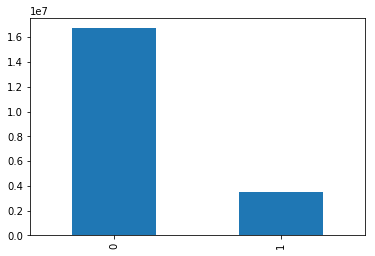

In [5]:
df['click'].value_counts().plot(kind='bar')

In [9]:
df['click'].mean()*100

16.980562476404604

In [5]:
hour=df['hour']
df.drop(['hour'],axis=1,inplace=True)

In [6]:
print hour.shape
print list(df)

In [7]:
df['year']=[np.int8('20'+x[0:2]) for x in hour]
df['month']=[np.int8(x[2:4]) for x in hour]
df['month']=df['month'].apply(lambda x: calendar.month_abbr[x])
df['day']=[np.int8(x[4:6]) for x in hour]
df['time']=[np.int8(x[6:8]) for x in hour]

In [10]:
year_dummies=pd.get_dummies(df['year'])
month_dummies=pd.get_dummies(df['month'])
day_dummies=pd.get_dummies(df['day'])
time_dummies=pd.get_dummies(df['time'])

In [11]:
df.drop(['year'],axis=1,inplace=True)
df.drop(['month'],axis=1,inplace=True)
df.drop(['day'],axis=1,inplace=True)
df.drop(['time'],axis=1,inplace=True)
list(df)

['click', 'C1', 'banner_pos', 'site_category', 'app_category']

In [12]:
C1_dummies=pd.get_dummies(df['C1'])
banner_pos_dummies=pd.get_dummies(df['banner_pos'])
site_category_dummies=pd.get_dummies(df['site_category'])
app_category_dummies=pd.get_dummies(df['app_category'])
click=df['click']

In [14]:
frame=[year_dummies,month_dummies,day_dummies,time_dummies
    ,C1_dummies,banner_pos_dummies,site_category_dummies
    ,app_category_dummies,click]
result1=pd.concat(frame)

MemoryError: 

In [ ]:
hdf =pd.HDFStore('data1.h5')
hdf.put('/home/ashwin/Downloads/clickthrough/hdf/data1', result1, format='table', data_columns=True)

In [13]:
del df
chunlsize=1000000
data_chunks=pd.read_csv('/home/ashwin/Downloads/clickthrough/train.csv'
                 ,chunksize=chunlsize,usecols=coloums2,nrows=20214484,
                 dtype={'device_type':np.int8,'device_conn_type':np.int8,'C14':np.int16,'C15':np.int16,'C16':np.int16,
'C17':np.int16,'C18':np.int8,'C19':np.int16,'C20':np.int32,'C21':np.int16})
df = pd.concat([chunk for chunk in data_chunks])